# Practice 12: Artificial Neural Network
In this practice, you are required to complete all the code marked with `TODO` in order to implement a 4-layer artificial neural network, and then train and test your model on the MNIST dataset.

📌 **DDL: Dec.28th**

Your submission will be assessed on:

* Clear understanding of every line of your code (no blind copy-paste).
* Successful compilation of the program.
* Correctness of the program logic.
* Reasonable efficiency of the solution.

### Grading Policy

* **On-time submission:** 60–100 points
* **Late submission:** 0 points


### Part 1: Artificial Neural Network
Artificial Neural Network (ANN) consists of multiple artificial neurons, usually having the structure of an input layer, multiple hidden layer, an output layer. **Layers** in the artificial neural network consist of **neurons**.

Suppose that we have a N-layer ($N\geq2$) ANN. The first layer is the input layer. The last layer is the output layer. For $n$-th layer ($n\geq2$) with $d_n$ nodes, given the input from the last layer $x^{(n-1)}_i$ with $d_{n-1}$ nodes, the output of this layer is:
$$x^{(n)}_i=g(a^{n})=g(w^{(n)}x^{(n-1)}+b^{(n)}),$$
where $g$ is the activation function, $w^{n}$ is the weights from layer $n-1$ to layer $n$ with a size of $(d_n*d_{n-1})$, and $b^{(n)}$ is the bias.

For example, in a 4-layer ANN, the output of each layer is processing in this way:
$$\mathbf{x} = \mathbf{x}^{(1)} \rightarrow \mathbf{x}^{(2)} \rightarrow \mathbf{x}^{(3)}\rightarrow \mathbf{x}^{(4)} = \hat{y}$$

<hr>

Given a train dataset $\mathbb{D}_{train}=\{(\mathbf{x}_i, y_i)|i \in [1,m], \mathbf{x}_i \in \mathbb{R}^d, y_i \in \{1, 2, ..., K\}\}$. The cross-entropy loss function is:
$$Loss=\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}-t_i^k log \hat{y}^k_i + \frac{\lambda}{2}||W||^2_2,$$
where $-t_i^k$ is the $k$-th value of the one-hot vector of $y_i$, $\hat{y}^k_i$ is the $k$-th value of the output from the ANN, and $\lambda$ is the weight of the regularization term.

To minimize the loss function, we will conduct batch gradient descent algorithm. For the $n$-th layer ($n\geq2$) in a $N$-layer ($N\geq2$) ANN, the gradient of the loss function on weight matrix $w^{(n)}$ is:
$$\frac{\partial Loss}{w^{(n)}} = \frac{\partial Loss}{\partial x^{(N)}}\frac{\partial x^{(N)}}{\partial x^{(N-1)}}...\frac{\partial x^{(n+1)}}{\partial x^{(n)}}\frac{\partial x^{(n)}}{\partial w^{(n)}}.$$

<hr>

In this work, we will use relu activation function in hidden layers and the softmax function in the output layer.
* The gradient on weigths of the output layer is: (derivation process can be found in <https://deepnotes.io/softmax-crossentropy>)
$$\frac{\partial Loss}{w^{(N)}} = \frac{\partial Loss}{\partial a^{(N)}}\frac{\partial (a^{N})}{\partial w^{(N)}}= \frac{1}{m}\sum_{i=1}^{m}(x^{(N-1)}_i)^T*(\hat{y}_i-y_i)$$
let $\delta_N=\frac{\partial Loss}{\partial a^{(N)}}=(\hat{y}_i-y_i)$, then 
$$\frac{\partial Loss}{w^{(N)}} = \frac{1}{m}\sum_{i=1}^{m}\delta_N(x^{(N-1)}_i)^T+\lambda w^{(N)}$$
$$\frac{\partial Loss}{\partial b^{(N)}}= \frac{1}{m}\sum_{i=1}^{m}\delta_N$$

* For the penultimate layer $N-1$ (derivation process can be found in <https://sudeepraja.github.io/Neural/>):
$$\frac{\partial Loss}{w^{(N-1)}} = \frac{\partial Loss}{\partial a^{(N-1)}}\frac{\partial a^{(N-1)}}{\partial w^{(N-1)}} = \frac{1}{m}\sum_{i=1}^{m}(x^{(N-2)}_i)^T\delta_{N-1},$$
$$\frac{\partial Loss}{\partial b^{(N-1)}}= \frac{1}{m}\sum_{i=1}^{m}\delta_{N-1}$$
where$$\delta_{N-1}=\frac{\partial Loss}{\partial a^{(N-1)}}=\delta_{N}(w^{(N)})^T\circ\frac{\partial g(a^{(N-1)})}{\partial a^{(N-1)}}$$

* So, for the $n$-th layer ($2\leq n\leq N-1$):
$$\frac{\partial Loss}{w^{(n)}} = \frac{\partial Loss}{\partial a^{(n)}}\frac{\partial a^{(n)}}{\partial w^{(n)}} = \frac{1}{m}\sum_{i=1}^{m}(x^{(n-1)}_i)^T\delta_{n}+ \lambda w^{(n)},$$
$$\frac{\partial Loss}{\partial b^{(n)}}= \frac{1}{m}\sum_{i=1}^{m}\delta_{n}$$
where$$\delta_{n}=\frac{\partial Loss}{\partial a^{(n)}}=\delta_{n+1}(w^{(n+1)})^T\circ\frac{\partial g(a^{(n)})}{\partial a^{(n)}}.$$

<hr>

Based on above derivations, you need to complete the missing code in the following.

### Part 2: Design a ANN for MNIST dataset

MNIST stand for Mixed National Institute of Standards and Technology, whch has produced a handwritten digits dataset. This dataset is one of the most popular datasets in machine learning. 

The overall all dataset contains 60000 training images and 10000 testing images with 10 classes from 0 to 9, formmatted as $28*28$ pixel monochrome images.

![MNIST](./MNIST.png)

The mnist is already downloaded in the file `data.pkl`. Let's import the data and standarize it. 

In [37]:
import pickle

(train_images, train_labels, 
     test_images, test_labels) = pickle.load(open('data.pkl', 'rb'),encoding='latin1')

### normalize all pixels to [0,1) by dividing 256
train_images = train_images/256.0
test_images = test_images/256.0
print(type(train_images[0][0]))

<class 'numpy.float64'>


Next, we need to design an ANN to conduct the classifcation task in MNIST dataset. As shown in PPT, this ANN have your layers:
* Layer 1: input layer, size 784 = $28*28$
* Layer 2: Hidden layer, size = 300, activation = relu
* Layer 3: Hidden layer, size = 100, activation = relu
* Layer 4: Output layer , size = 10, activation = softmax
![ANN](./ANN.png)
You need to complete the following parts:
1. Initialize the all parameters in ANN
2. Complete the forward process of hidden layer
3. Complete the forward process of output layer
4. Complete the loss calculation function
5. Calculate the gradient on these layers

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def xavier(n1, n2):
    """
    Initialize a matrix with a shape of (n1, n2)
    
    :param n1: int, number of rows of the matrix
    :param n2: int, number of columns of the matrix
    
    :return:
        ndarray: numpy.ndarray, a random matrix generated by the uniform distribution.
    """
    # x = np.sqrt(6*1.0/(n1 + n2))
    # ndarray = np.random.uniform(low=-x, high=x, size=(n1, n2))
    stddev = np.sqrt(2.0/n1)
    ndarray = np.random.randn(n1, n2) * stddev
    return ndarray

def softmax(ndarray):
    """
    Softmax function for input with a shape of (batch_size, n_classes)
    
    :param ndarray: numpy.ndarray, the output of the last layer in ANN with a shape of (batch_size, n_classes)
    
    :return:
        numpy.ndarray, the softmax output with a shape of (batch_size, n_classes)
    """
    r = ndarray.shape[0]
    c = ndarray.shape[1]
    max_arr = np.tile(ndarray.max(axis=1).reshape(r,1), (1,c))
    e_x = np.exp(ndarray - max_arr)
    return e_x / np.tile(e_x.sum(axis=1).reshape(r,1), (1,c))

def relu(ndarray):
    return np.maximum(ndarray, 0)

def d_relu(ndarray):
    ndarray[ndarray>0] = 1
    ndarray[ndarray<=0] = 0
    return ndarray

def getLabel(ndarray,BATCHSIZE,num_output):
    label = np.zeros((BATCHSIZE, num_output))
    for i in range(0, BATCHSIZE):
        idx = ndarray[i]
        label[i][idx] = 1
    return label

In [39]:
def Parameter_initialization(input_size, hidden1_size, hidden2_size, output_size):
    """
    Parameter initialization function for our ANN.
    
    :param input_size: int
    :param hidden1_size: int
    :param hidden2_size: int
    :param output_size: int
    
    :return:
        Parameter: dict, a dictionary to store the parameters in ANN.
    """
    # TODO 1:
    # Please Initialize all parameters used in ANN-Hidden Layers with Xavier
    Parameter={}
    #Your code starts here
    w2 = xavier(input_size, hidden1_size)
    b2 = np.zeros((1, hidden1_size))
    w3 = xavier(hidden1_size, hidden2_size) 
    b3 = np.zeros((1, hidden2_size))
    w4 = xavier(hidden2_size, output_size)
    b4 = np.zeros((1, output_size))
    #Your code ends here
    
    Parameter['w2']=w2
    Parameter['b2']=b2
    
    Parameter['w3']=w3
    Parameter['b3']=b3
    
    Parameter['w4']=w4
    Parameter['b4']=b4
    
    return Parameter

def Hidden_Layer(x, w, b):
    """
    Return the output of the hidden layer.

    :param x: numpy.ndarray with a shape of (n, input_dim), input data of this layer.
    :param w: numpy.ndarray, weights of this layer.
    :param b: numpy.ndarray, bias of this layer.
    
    :return:
        z: numpy.ndarray with a shape of (n, output_dim), output data of this layer
    """        
    # TODO 2: generate the outputs of this layer
    # Your code starts here
    z = np.dot(x, w) + b
    # Your code ends here

    return z

def Output_Layer(x, w, b):
    """
    Return the output of the output layer.

    :param x: numpy.ndarray with a shape of (n, input_dim), input data of this layer.
    :param w: numpy.ndarray, weights of this layer.
    :param b: numpy.ndarray, bias of this layer.
    
    :return:
        z: numpy.ndarray with a shape of (n, num_classes), output of the output layer
    """        
    # TODO 3: generate the outputs of this layer
    # Your code starts here
    z = np.dot(x, w) + b
    # Your code ends here

    return z

def Loss(label, output):
    """
    Return the loss of ANN.

    :param label: numpy.ndarray with a shape of (n, num_classes), true labels (each line is a one-hot vector)
    :param output: numpy.ndarray with a shape of (n, num_classes), predicted results of your model
    
    :return:
        cross_entropy_loss: float, 
    """
    # TODO 4: calculate the loss of the output
    # Your code starts here
    output = np.clip(output, 1e-8, 1.0)
    cross_entropy_loss = -np.mean(np.sum(label * np.log(output), axis=1))
    # Your code ends here
    
    return cross_entropy_loss

def BP_output(predict, label, w, x , lam):
    """
    Return the gradients of loss on the weight of output layer, and the delta_N
    
    :param predict: numpy.ndarray with a shape of (n, num_classes), predicted results of your model
    :param label: numpy.ndarray with a shape of (n, num_classes), true labels (each line is a one-hot vector)
    :param w: weight matrix from hidden layer 2 to output layer
    :param x: input of the output layer
    :param lam: the weight of the regularization term
    
    :return:
        grad_w: gradient of loss on the weight of output layer
        grad_b: gradient of loss on the bias of output layer
        delta_N: partial loss / partial a_N
    """
    # TODO 5: calculate the gradients of loss on the weight of output layer
    m = label.shape[0]
    delta_N = (predict - label) / m
    grad_w = np.dot(x.T, delta_N) + lam * w
    grad_b = np.sum(delta_N, axis=0, keepdims=True)

    return  grad_w, grad_b, delta_N

def BP_hidden(delta_n_1, w_n_1, w_n, b_n, x, lam):
    """
    Return the gradients of loss on the weight of layer n and the delta_n.
    
    :param delta_n_1: numpy.ndarray with a shape of (n, size_layer(n+1)), delta of the layer n+1
    :param w_n_1: weight matrix of layer n+1 with a shape of (size_layer(n), size_layer(n+1))
    :param w_n: weight matrix of layer n with a shape of (size_layer(n-1), size_layer(n))
    :param b_n: bias of layer n with a shape of (1, size_layer(n))
    :param x: input of layer n with a shape of (n, size_layer(n-1))
    :param lam: the weight of the regularization term
    
    :return:
        grad_w: gradient of loss on the weight of current hidden layer n
        grad_b: gradient of loss on the bias of current hidden layer n
        delta_n: partial loss / partial a_n
    """
    # TODO 6: calculate the gradients of loss on the weight of hidden layer  
    z_n = np.dot(x, w_n) + b_n
    delta_n = np.dot(delta_n_1, w_n_1.T) * d_relu(z_n)
    grad_w = np.dot(x.T, delta_n) + lam * w_n
    grad_b = np.sum(delta_n, axis=0, keepdims=True)
    
    return  grad_w, grad_b, delta_n

After finishing the ANN codes, let's test it on the MNIST dataset.

In [40]:
# 1. Hyper parameters
EPOCH = 100
ITERS = 100
BATCHSIZE = 100
LR_BASE = 0.005
lam = 0.0005  # lambda
num_input = 784
num_layer1 = 512
num_layer2 = 256
num_output = 10

Epoch 1: 
1.8671780653870171
Accuracy: 
0.41300000000000003
Epoch 2: 
1.260017074886183
Accuracy: 
0.511
Epoch 3: 
0.9755826740237852
Accuracy: 
0.5660000000000001
Epoch 4: 
0.9321069843098188
Accuracy: 
0.596
Epoch 5: 
0.9056541677657762
Accuracy: 
0.625
Epoch 6: 
0.8877373169364229
Accuracy: 
0.646
Epoch 7: 
0.8738463950767297
Accuracy: 
0.6619999999999999
Epoch 8: 
0.5858339681030302
Accuracy: 
0.671
Epoch 9: 
0.5603541790837201
Accuracy: 
0.688
Epoch 10: 
0.5454399716076491
Accuracy: 
0.7030000000000001
Epoch 11: 
0.5344170343925352
Accuracy: 
0.714
Epoch 12: 
0.5258778835118357
Accuracy: 
0.721
Epoch 13: 
0.5187349618400335
Accuracy: 
0.728
Epoch 14: 
0.5129014952497928
Accuracy: 
0.73
Epoch 15: 
0.5079120224420985
Accuracy: 
0.734
Epoch 16: 
0.5034957807757856
Accuracy: 
0.735
Epoch 17: 
0.5000447121855446
Accuracy: 
0.738
Epoch 18: 
0.4970120488672759
Accuracy: 
0.739
Epoch 19: 
0.49426793919913287
Accuracy: 
0.748
Epoch 20: 
0.4920042367330032
Accuracy: 
0.753
Epoch 21: 
0.4899

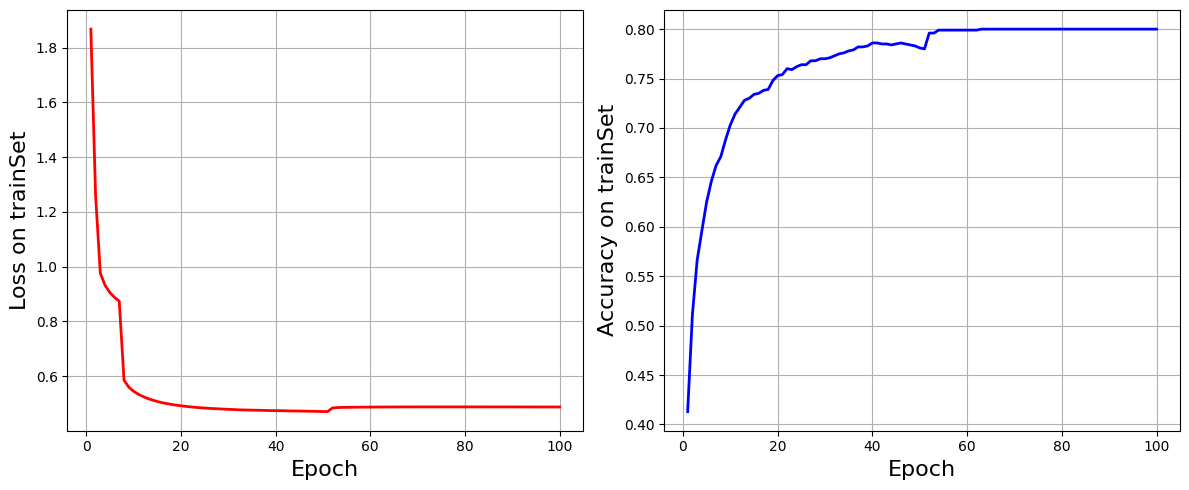

In [41]:
# 2. Weight initialization: Xavier
Parameter = Parameter_initialization(num_input,num_layer1,num_layer2,num_output)
w2, w3, w4=Parameter['w2'], Parameter['w3'], Parameter['w4']
b2, b3, b4=Parameter['b2'], Parameter['b3'], Parameter['b4']

# 3. training of neural network
loss = np.zeros((EPOCH))   #save the loss of each epoch
accuracy = np.zeros((EPOCH))  #save the accuracy of each epoch
for epoch in range(0, EPOCH):
    if epoch <= EPOCH/2:
        lr = LR_BASE
    else:
        lr = LR_BASE / 10.0
    for iters in range(0, ITERS):
        image_blob = train_images[iters*BATCHSIZE:(iters+1)*BATCHSIZE, :] # 100*784
        label_blob = train_labels[iters*BATCHSIZE:(iters+1)*BATCHSIZE] # 100*1
        label = getLabel(label_blob,BATCHSIZE,num_output)
        # Forward propagation  Hidden Layer
        x1 = image_blob
        x2 = Hidden_Layer(x1,w2,b2)
        x3 = Hidden_Layer(x2,w3,b3)
        # Forward propagation  output Layer
        x4 = Output_Layer(x3,w4,b4)
        y_hat = x4
        if np.count_nonzero(y_hat) != 1000:
            print(y_hat)
        #comupte loss
        loss_tmp = Loss(label,y_hat)

        if iters % 100 == 99:
            loss[epoch] = loss_tmp
            print('Epoch '+str(epoch+1)+': ')
            print(loss_tmp)
        # Back propagation
        grad_w4, grad_b4, delta_4 = BP_output(y_hat, label, w4, x3, lam) # output layer
        grad_w3, grad_b3, delta_3 = BP_hidden(delta_4, w4, w3, b3, x2, lam) # hidden layer 2
        grad_w2, grad_b2, delta_2 = BP_hidden(delta_3, w3, w2, b2, x1, lam) # hidden layer 1

        # Gradient update
        w2 = w2 - lr*(grad_w2)
        w3 = w3 - lr*(grad_w3)
        w4 = w4 - lr*(grad_w4)
        b2 = b2 - lr*(grad_b2)
        b3 = b3 - lr*(grad_b3)
        b4 = b4 - lr*(grad_b4)


        # Testing for accuracy
        if iters % 100 == 99:
            x1 = test_images
            x2 = Hidden_Layer(x1,w2,b2)
            x3 = Hidden_Layer(x2,w3,b3)
            # Forward propagation  output Layer
            x4 = Output_Layer(x3,w4,b4)
            y_hat = x4
            
            predict = np.argmax(y_hat, axis=1)
            print('Accuracy: ')
            accuracy[epoch] = 1 - np.count_nonzero(predict - test_labels)*1.0/1000
            print(accuracy[epoch])

### 4. Plot
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax1.plot(np.arange(EPOCH)+1, loss[0:], 'r', label='Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss on trainSet', fontsize=16)
plt.grid()
ax2 = plt.subplot(122)
ax2.plot(np.arange(EPOCH)+1, accuracy[0:], 'b', label='Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy on trainSet', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('figure.pdf')
plt.show()